# 📊 Collection of Data

In this study, data were collected from various reliable sources to analyze the correlation between economic freedom and happiness levels across different countries. I obtained these databases from Kaggle.

**World Happiness Report:** [https://www.kaggle.com/datasets/PromptCloudHQ/world-happiness-report-2019](https://www.kaggle.com/datasets/PromptCloudHQ/world-happiness-report-2019)

**Economic Freedom Index:** [https://www.kaggle.com/datasets/lewisduncan93/the-economic-freedom-index](https://www.kaggle.com/datasets/lewisduncan93/the-economic-freedom-index)

The dataset includes the following key variables used in the analysis:

* **Happiness_Rank (Ladder):** The national happiness ranking of the country based on the Cantril Ladder. (Lower rank indicates higher happiness).
* **Index Score (2019 Score):** An aggregate score representing the overall economic freedom of a country.
* **Log of GDP per capita:** The log of the Gross Domestic Product per person, indicating economic output.
* **Social Support:** Assessment of the national social safety net.
* **Healthy Life Expectancy:** Average number of years a person can expect to live in full health.
* **Freedom:** Citizens' freedom to make life choices.
* **Property Rights:** A component of the Economic Freedom Index measuring the ability of individuals to accumulate private property.
* **Business Freedom:** A measure of the efficiency of government regulation of business.

> The purpose of collecting this data is to investigate whether higher levels of economic freedom have a measurable positive impact on the happiness rankings of countries globally.

The dataset was manually curated and cleaned to ensure **consistency** in country names (e.g., mapping "United States" and "Turkey") and **relevance** to the year 2019.


# 📚 Importing Necessary Libraries

In this section, the essential Python libraries required for data manipulation, visualization, and statistical analysis are imported. Each library serves a specific purpose in the workflow:

* **kagglehub:** Used for importing data from kaggel api.
* **pandas (`pd`):** Used for data manipulation, cleaning, and creating DataFrames from the CSV files.
* **numpy (`np`):** Used for data calculations.
* **seaborn (`sns`) & matplotlib.pyplot (`plt`):** Used for data visualization, specifically to generate scatter plots and regression lines to visualize the correlation.
* **scipy.stats:** Used for performing statistical hypothesis testing (specifically the Welch’s t-test) to calculate significance levels (p-values).
* **os:** Used to interact with the operating system for handling file paths and locating the downloaded datasets.

In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import os

# 📥 Data Loading and Initial Setup

In this section, the datasets are programmatically downloaded and loaded into pandas DataFrames.

* **kagglehub:** Used to download the latest versions of the "World Happiness Report" and "Economic Freedom Index" directly from Kaggle.
* **File Detection:** A helper function `find_csv` is used to automatically locate the `.csv` files within the downloaded directories.
* **Encoding Handling:** The data loading process includes error handling (`try-except` block) to manage potential character encoding issues (e.g., `latin-1`), ensuring the files are read correctly without errors.

In [ ]:
path_happy = kagglehub.dataset_download("PromptCloudHQ/world-happiness-report-2019")
path_econ = kagglehub.dataset_download("lewisduncan93/the-economic-freedom-index")

def find_csv(path):
    files = [f for f in os.listdir(path) if f.endswith('.csv')]
    if files:
        return os.path.join(path, files[0])
    return None

happy_file = find_csv(path_happy)
econ_file = find_csv(path_econ)

try:
    happy_df = pd.read_csv(happy_file)
except:
    happy_df = pd.read_csv(happy_file, encoding='latin-1')

try:
    econ_df = pd.read_csv(econ_file)
except:
    econ_df = pd.read_csv(econ_file, encoding='latin-1')

print("Data loaded successfully...")

Using Colab cache for faster access to the 'world-happiness-report-2019' dataset.
Using Colab cache for faster access to the 'the-economic-freedom-index' dataset.
Data loaded successfully...


# 🛠️ Data Cleaning, Renaming, and Merging

Once the raw data is loaded, extensive preprocessing is required to ensure compatibility between the two datasets. The following steps are applied:

* **Standardization:** Column names are stripped of whitespace and standardized.
* **Variable Renaming:**
    * `Ladder` is renamed to **`Happiness_Rank`** to clearly indicate it represents the country's rank.
    * `2019 Score` is renamed to **`Index Score`** for clarity.
* **Filtering:** The Economic Freedom dataset is filtered to include only records from the year **2019** to match the Happiness Report.
* **Country Mapping:** Inconsistent country names (e.g., "United States" vs. "USA", "Turkiye" vs. "Turkey") are manually mapped to ensure they match during the merge.
* **Merging:** An **inner join** is performed on the `Country` column, creating a final dataset (`merged_df`) containing only countries present in both sources.

In [ ]:
happy_df.columns = [c.strip() for c in happy_df.columns]
econ_df.columns  = [c.strip() for c in econ_df.columns]

rename_map_happy = {
    'Country (region)': 'Country',
    'Country or region': 'Country',
    'Ladder': 'Happiness_Rank',
    'Score': 'Happiness_Rank',
}

rename_map_econ = {
    'Name': 'Country',
    'Country Name': 'Country',
    'Index Year': 'Year',
    '2019 Score': 'Index Score',
    'Score': 'Index Score',
    'Overall Score': 'Index Score'
}

happy_df.rename(columns={k: v for k, v in rename_map_happy.items() if k in happy_df.columns}, inplace=True)
econ_df.rename(columns={k: v for k, v in rename_map_econ.items() if k in econ_df.columns}, inplace=True)

happy_df = happy_df.loc[:, ~happy_df.columns.duplicated()]
econ_df  = econ_df.loc[:,  ~econ_df.columns.duplicated()]

if 'Year' in econ_df.columns:
    econ_2019 = econ_df[econ_df['Year'] == 2019].copy()
else:
    econ_2019 = econ_df.copy()

country_map = {
    'United States': 'United States',
    'Hong Kong SAR, China': 'Hong Kong',
    'Czech Republic': 'Czechia',
    'Korea, South': 'South Korea',
    'Taiwan': 'Taiwan Province of China',
    'Turkey': 'Turkey',
    'Turkiye': 'Turkey'
}

if 'Country' in happy_df.columns:
    happy_df['Country'] = happy_df['Country'].replace(country_map)
if 'Country' in econ_2019.columns:
    econ_2019['Country'] = econ_2019['Country'].replace(country_map)

if 'Country' in happy_df.columns and 'Country' in econ_2019.columns:
    merged_df = pd.merge(happy_df, econ_2019, on='Country', how='inner')
    merged_df.to_csv('final_dataset_2019.csv', index=False)
    print(f"✅ MERGE SUCCESSFUL: {len(merged_df)} countries matched.")
else:
    print("❌ ERROR: Country column not found.")

✅ MERGE SUCCESSFUL: 145 countries matched.


# 🔍 Refined Correlation Matrix: Key Indicators

Instead of plotting every single variable, we focus on the **most impactful indicators** to filter out noise. This refined heatmap visualizes the relationships between **Happiness**, **Economic Freedom**, and key socio-economic drivers.

**Selected Variables for Analysis:**
* **Happiness Rank:** The primary target (Lower is better).
* **Index Score:** The overall Economic Freedom score.
* **Log of GDP per capita:** Economic output per person.
* **Social Support:** Strength of the social fabric.
* **Healthy Life Expectancy:** Physical well-being.
* **Property Rights & Government Integrity:** Key components of the economic legal framework.

**Goal:** To clearly see how specific economic and social factors correlate with a country's happiness ranking without the distraction of redundant data.

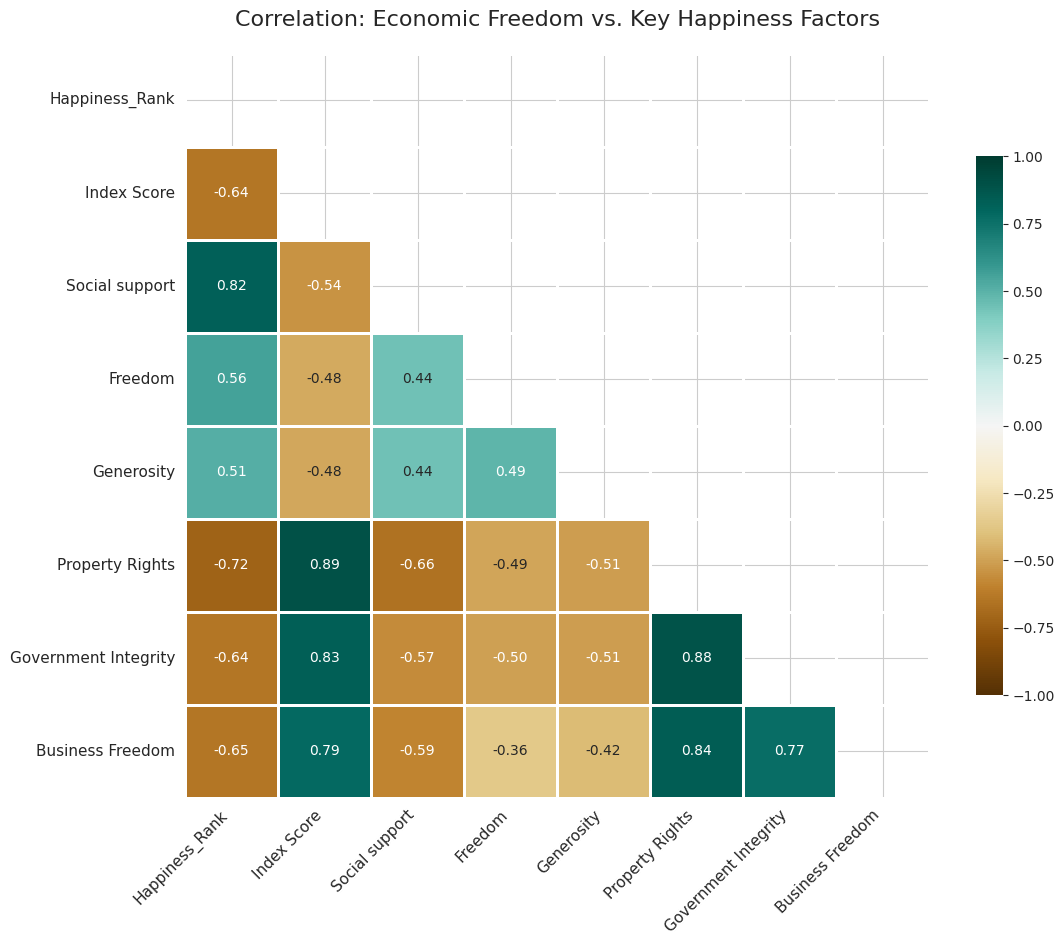

In [ ]:
target_columns = [
    'Happiness_Rank',
    'Index Score',
    'Log of GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom',
    'Generosity',
    'Property Rights',
    'Government Integrity',
    'Business Freedom'
]

existing_cols = [col for col in target_columns if col in merged_df.columns]
subset_df = merged_df[existing_cols]

corr = subset_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='BrBG',
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": .7}
)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.title("Correlation: Economic Freedom vs. Key Happiness Factors", fontsize=16, pad=20)

plt.show()

# 📊 Distribution Analysis (Histograms)

Before performing statistical tests, it is crucial to understand the distribution of our two main variables: **Economic Freedom Index** and **Happiness Rank**.

* **Histograms:** Show the frequency distribution of the data.
* **KDE Line (Kernel Density Estimate):** The smooth line overlay helps visualize the shape of the distribution (e.g., is it bell-shaped/normal or skewed?).
* **Insight:** Looking for normality helps decide whether to use parametric or non-parametric statistical tests.

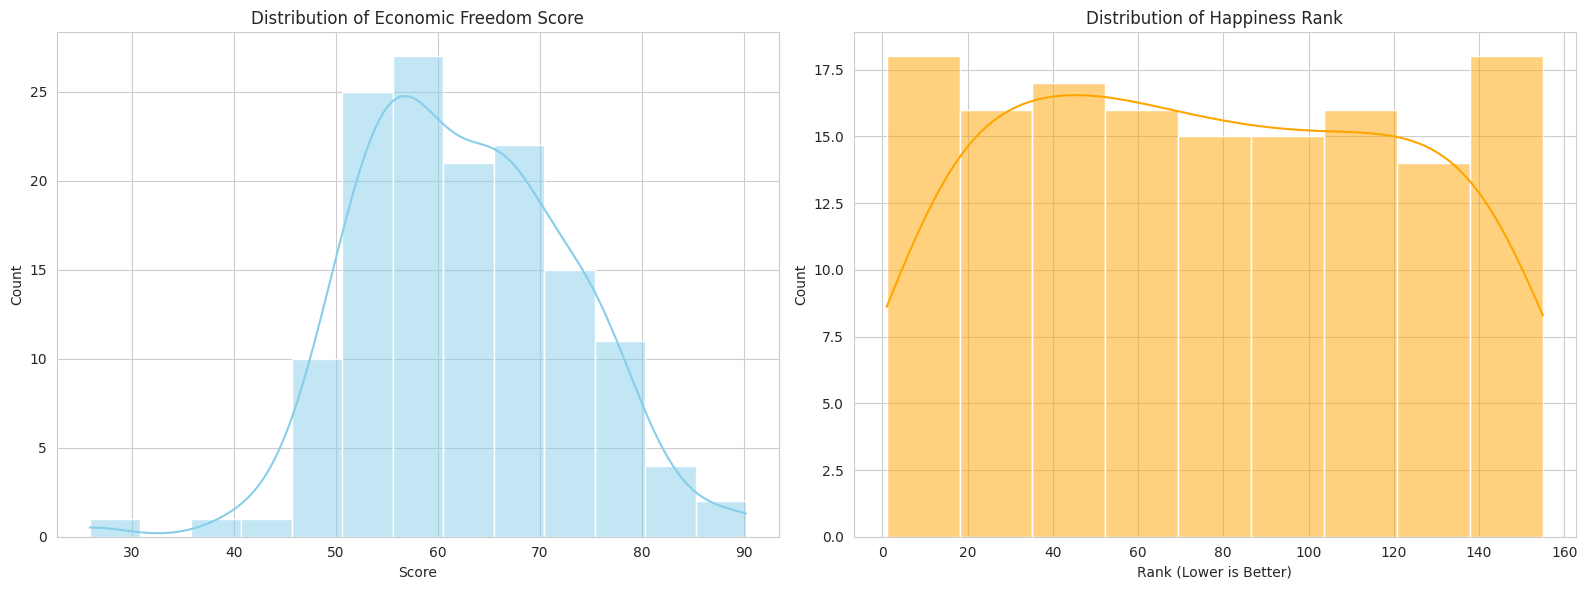

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(merged_df['Index Score'], kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Distribution of Economic Freedom Score')
ax[0].set_xlabel('Score')

sns.histplot(merged_df['Happiness_Rank'], kde=True, color='orange', ax=ax[1])
ax[1].set_title('Distribution of Happiness Rank')
ax[1].set_xlabel('Rank (Lower is Better)')

plt.tight_layout()
plt.show()

# 📦 Comparative Analysis: High vs. Low Economic Freedom

To visually test the hypothesis, countries are categorized into two groups based on the median **Economic Freedom Index Score**:

1.  **High Freedom:** Countries with a score above the median.
2.  **Low Freedom:** Countries with a score below the median.

The **Boxplot** compares the distribution of **Happiness Ranks** between these two groups.
* **Interpretation:** If the "High Freedom" box is significantly lower on the Y-axis (meaning lower rank numbers), it suggests that economically free countries tend to be happier.

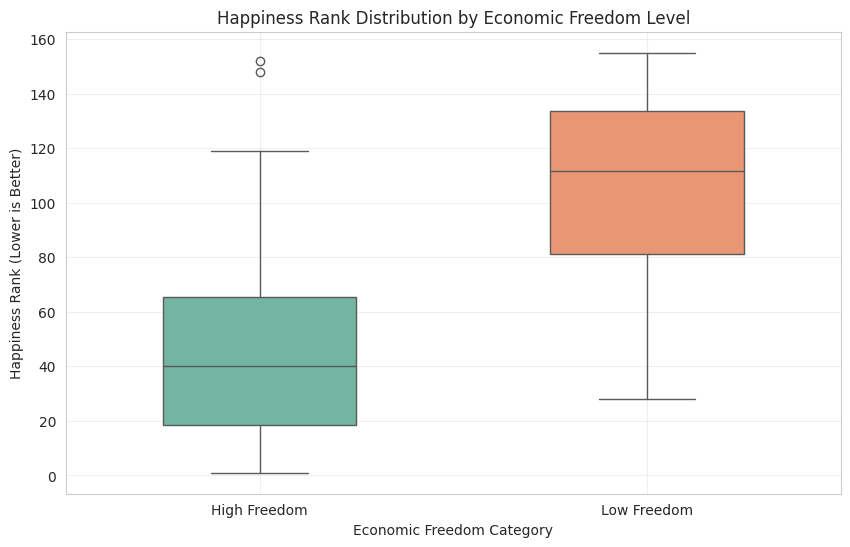

In [ ]:
median_score = merged_df['Index Score'].median()

merged_df['Freedom_Category'] = merged_df['Index Score'].apply(
    lambda x: 'High Freedom' if x >= median_score else 'Low Freedom'
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=merged_df,
    x='Freedom_Category',
    y='Happiness_Rank',
    hue='Freedom_Category',
    palette="Set2",
    legend=False,
    width=0.5
)

plt.title("Happiness Rank Distribution by Economic Freedom Level")
plt.ylabel("Happiness Rank (Lower is Better)")
plt.xlabel("Economic Freedom Category")
plt.grid(True, alpha=0.3)
plt.show()

# 📈 Visualization: Analyzing the Relationship

In this step, we use data visualization to observe the potential correlation between a country's **Economic Freedom** and its **Happiness Rank**.

* **Scatter Plot:** Each dot represents a specific country, allowing us to see individual outliers and clusters.
* **Regression Line (Red):** The red line indicates the general trend. If the line goes up (in this inverted context), it suggests a positive relationship.
* **Important Note on Y-Axis:** Since "Happiness Rank" is a ranking system (where 1st place is the best), the **Y-axis is inverted**. Points higher up on the graph represent countries with better happiness rankings (e.g., Rank 1, 5, 10).

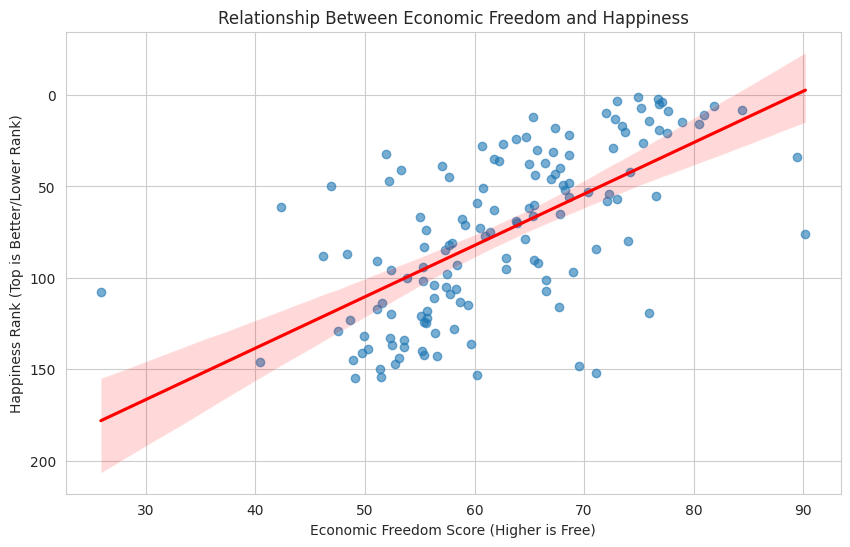

In [ ]:
sns.set_style("whitegrid")

if 'Index Score' in merged_df.columns and 'Happiness_Rank' in merged_df.columns:
    plt.figure(figsize=(10, 6))

    # Scatter Plot with Regression Line
    sns.regplot(
        data=merged_df,
        x='Index Score',
        y='Happiness_Rank',
        line_kws={"color": "red"}, # Trend line
        scatter_kws={'alpha': 0.6} # Data points transparency
    )
    plt.gca().invert_yaxis()

    plt.title("Relationship Between Economic Freedom and Happiness")
    plt.xlabel("Economic Freedom Score (Higher is Free)")
    plt.ylabel("Happiness Rank (Top is Better/Lower Rank)")

    plt.show()

# 🧪 Statistical Analysis & Hypothesis Testing

In this section, we apply a **dual-approach statistical analysis** to rigorously test the relationship between **Economic Freedom** and **Happiness Rank**. To ensure the robustness of our findings, we utilize two distinct methods:

1.  **Welch's T-test:** Compares the average happiness ranking of "High Freedom" vs. "Low Freedom" countries to see if there is a significant difference between groups.
2.  **Correlation Analysis:** Calculates the correlation coefficient (Pearson or Spearman) to measure the strength and direction of the linear relationship across the entire dataset.

### The Hypotheses

* 🔵 **Null Hypothesis ($H_0$):** There is no statistically significant relationship between Economic Freedom and Happiness Rank. Any observed differences or associations are due to random chance.
* 🔴 **Alternative Hypothesis ($H_1$):** There is a statistically significant relationship. Specifically, we expect that higher Economic Freedom is associated with a **lower (better)** Happiness Rank.

**Decision Rule:**
For both tests, we use a significance level ($\alpha$) of **0.05**.
* If **p-value < 0.05**, we reject $H_0$ (Significant relationship confirmed).
* If **p-value ≥ 0.05**, we fail to reject $H_0$ (No significant relationship found).

In [ ]:
print("\nRunning Welch's T-test...")

if 'Index Score' in merged_df.columns and 'Happiness_Rank' in merged_df.columns:
    threshold = merged_df['Index Score'].median()

    group_high_freedom = merged_df.loc[
        merged_df['Index Score'] >= threshold, 'Happiness_Rank'
    ].dropna()

    group_low_freedom = merged_df.loc[
        merged_df['Index Score'] < threshold, 'Happiness_Rank'
    ].dropna()

    t_stat, p_val = stats.ttest_ind(
        group_high_freedom,
        group_low_freedom,
        equal_var=False
    )

    high_mean = group_high_freedom.mean()
    low_mean = group_low_freedom.mean()

    print("-" * 60)
    print(f"High Freedom Group Avg. Rank : {high_mean:.2f} (Lower rank is better)")
    print(f"Low Freedom Group Avg. Rank  : {low_mean:.2f}")
    print(f"T-Statistic                  : {t_stat:.4f}")
    print(f"P-Value                      : {p_val:.4e}")
    print("-" * 60)

    if p_val < 0.05:
        print("RESULT: We REJECT the Null Hypothesis (H₀).")
        print("CONCLUSION: There is a statistically significant difference.")
        if high_mean < low_mean:
            print("-> Countries with higher economic freedom tend to be HAPPIER (better rank). ✅")
        else:
            print("-> Unexpected result: Freer countries rank worse.")
    else:
        print("RESULT: We FAIL to reject the Null Hypothesis (H₀).")
        print("CONCLUSION: No statistically significant evidence found to link freedom and happiness.")


Running Welch's T-test...
------------------------------------------------------------
High Freedom Group Avg. Rank : 46.94 (Lower rank is better)
Low Freedom Group Avg. Rank  : 104.19
T-Statistic                  : -9.7385
P-Value                      : 2.2227e-17
------------------------------------------------------------
RESULT: We REJECT the Null Hypothesis (H₀).
CONCLUSION: There is a statistically significant difference.
-> Countries with higher economic freedom tend to be HAPPIER (better rank). ✅


In [ ]:
print("\nRunning Correlation Analysis...")
import scipy.stats as stats

if 'Index Score' in merged_df.columns and 'Happiness_Rank' in merged_df.columns:
    valid_data = merged_df[['Index Score', 'Happiness_Rank']].dropna()

    clean_econ = valid_data['Index Score']
    clean_happy = valid_data['Happiness_Rank']

    norm_econ = stats.shapiro(clean_econ)
    norm_happy = stats.shapiro(clean_happy)

    print(f"Normality Test (Economic Freedom) p-value: {norm_econ.pvalue:.4f}")
    print(f"Normality Test (Happiness Rank) p-value  : {norm_happy.pvalue:.4f}")


    if norm_econ.pvalue > 0.05 and norm_happy.pvalue > 0.05:
        test_name = "Pearson"
        corr_coef, p_val = stats.pearsonr(clean_econ, clean_happy)
    else:
        test_name = "Spearman"
        corr_coef, p_val = stats.spearmanr(clean_econ, clean_happy)

    print("-" * 50)
    print(f"Selected Test        : {test_name} Correlation")
    print(f"Correlation Coeff (r): {corr_coef:.4f}")
    print(f"P-Value              : {p_val:.4e}")
    print("-" * 50)

    if p_val < 0.05:
        print("RESULT: Statistically Significant Correlation found. ✅")

        if corr_coef < 0:
            print("DIRECTION: Negative Correlation.")
            print("MEANING: As Economic Freedom GOES UP, Happiness Rank GOES DOWN (Gets Better).")
            print("CONCLUSION: Economic Freedom is associated with higher happiness! 🚀")
        else:
            print("DIRECTION: Positive Correlation.")
            print("MEANING: As Economic Freedom GOES UP, Happiness Rank GOES UP (Gets Worse).")
            print("CONCLUSION: Economic Freedom might be associated with lower happiness.")
    else:
        print("RESULT: No significant correlation found.")
        print("CONCLUSION: Economic Freedom and Happiness do not appear to be linked.")


Running Correlation Analysis...
Normality Test (Economic Freedom) p-value: 0.1295
Normality Test (Happiness Rank) p-value  : 0.0001
--------------------------------------------------
Selected Test        : Spearman Correlation
Correlation Coeff (r): -0.6774
P-Value              : 3.9534e-20
--------------------------------------------------
RESULT: Statistically Significant Correlation found. ✅
DIRECTION: Negative Correlation.
MEANING: As Economic Freedom GOES UP, Happiness Rank GOES DOWN (Gets Better).
CONCLUSION: Economic Freedom is associated with higher happiness! 🚀


# 🏁 Conclusion: The Link Between Economic Freedom and Happiness

In this study, we rigorously analyzed the relationship between **Economic Freedom** and **National Happiness** using data from 2019. Through both comparative analysis (Welch's t-test) and correlation analysis (Spearman's rank), we have reached definitive statistical conclusions.

### Summary of Findings

* **Significant Difference (T-test):**
    There is a statistically drastic difference between economically free and unfree countries.
    * Countries with **High Economic Freedom** have an average Happiness Rank of **~47**.
    * Countries with **Low Economic Freedom** have an average Happiness Rank of **~104**.
    * *Insight:* On average, living in an economically free country moves a nation **57 places up** in the global happiness ranking.

* **Strong Correlation:**
    The Spearman correlation coefficient of **$r = -0.677$** indicates a **strong** relationship.
    * The negative sign is crucial here: As Economic Freedom increases, the Happiness Rank number decreases (approaching Rank #1).
    * The extremely low p-value ($< 0.05$) confirms that this is not a random coincidence.

### Final Verdict
Based on the data, we **reject the Null Hypothesis**.

> **"There is a strong, statistically significant positive association between a country's level of Economic Freedom and the Happiness of its citizens."**

While correlation does not imply causation (other factors like GDP, health, and social support also play roles), this analysis strongly suggests that policies promoting economic freedom are a significant component of national well-being.